Prince Kumar sharma

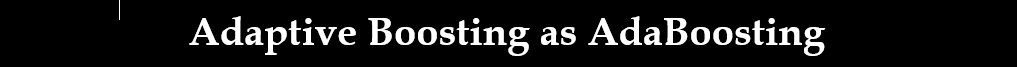


# Introduction
Boosting is an ensemble modeling technique that was first presented by Freund and Schapire in the year 1997. Since then, Boosting has been a prevalent technique for tackling binary classification problems. These algorithms improve the prediction power by converting a number of weak learners to strong learners.

## There are mainly 3 types of boosting algorithms:

1. AdaBoost algorithm in Machine Learning
2. Gradient descent algorithm
3. Xtreme gradient descent algorithm
#### Here I will be focusing on the AdaBoost algorithm. Gradient Descent and XGboost will be covered in upcoming Notebook.

# What is Adaboost ?
AdaBoost, also called Adaptive Boosting, is a technique in Machine Learning used as an Ensemble Method. The most common estimator used with AdaBoost is decision trees with one level which means Decision trees with only 1 split. These trees are also called Decision Stumps.

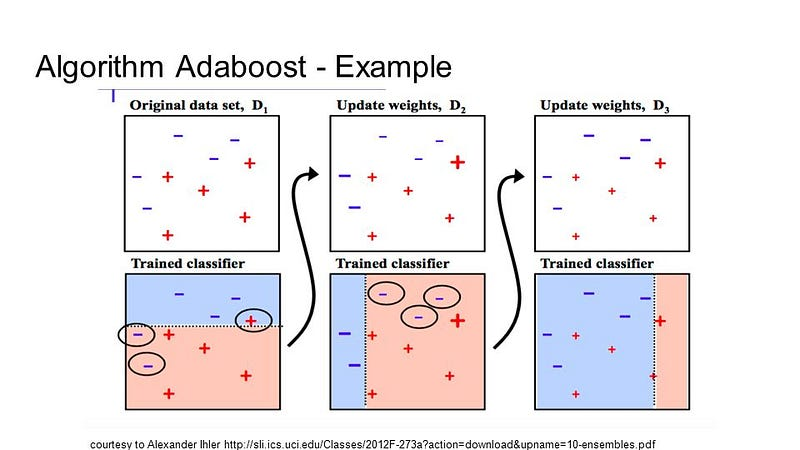

### Describe

AdaBoost (short for Adaptive Boosting) is a popular ensemble learning algorithm used in machine learning for classification and regression tasks. It is an iterative algorithm that combines weak classifiers to build a strong classifier.

In AdaBoost, each weak classifier is trained on a subset of the training data. During the training process, the algorithm assigns a weight to each training example based on its classification accuracy. Examples that are misclassified by the weak classifier are given higher weights, while correctly classified examples are given lower weights.

In each iteration, the algorithm trains a new weak classifier on the updated weights and combines it with the previous weak classifiers to create a strong classifier. The weights of the training examples are again updated based on the performance of the new classifier.

The final classifier is a weighted combination of the weak classifiers, where each weak classifier is assigned a weight based on its classification accuracy. The final classifier is more accurate than any of the individual weak classifiers.

AdaBoost is widely used in real-world applications because it is fast, simple to implement, and does not require complex parameter tuning. However, it can be sensitive to noisy data and outliers, and it may overfit the training data if the weak classifiers are too complex.

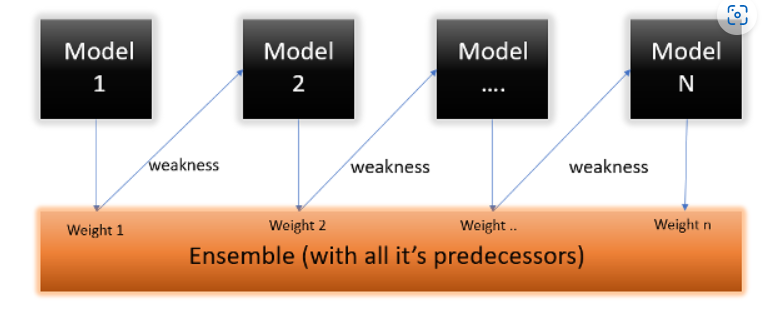

Q1. What are the advantages of the AdaBoost algorithm?
* A. Lesser preprocessing is required, as you do not need to scale the independent variables. Each iteration in the AdaBoost algorithm uses decision stumps as individual models, so the preprocessing required is the same as decision trees. AdaBoost is less prone to overfitting as well. In addition to boosting weak learners, we can also fine-tune hyperparameters(learning_rate, for example) in these ensemble techniques to get even better accuracy.

Q2. How do you use the AdaBoost algorithm?
* A. Much like random forests, decision trees, logistic regression, and svm classifiers, AdaBoost also requires the training data to have a target variable. This target variable could be either categorical or continuous. The scikit-learn library contains the Adaboost classifiers and regressors; hence we can use sklearn in python to create an adaboost model.

# DecisionStamp :

* The most common estimator used with AdaBoost is decision trees with one level which means Decision trees with only 1 split. These trees are also called Decision Stumps.

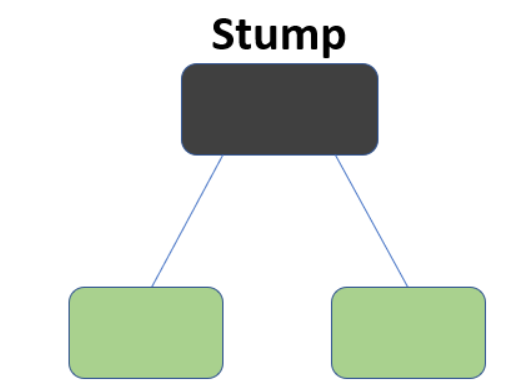

## Weak Learner :
* A weak learner in AdaBoost is a simple model that performs slightly better than random guessing on a given binary classification task. It is typically a decision tree or a stump (a decision tree with only one split) that takes a small subset of the features as input.

## The Goal Of the Adaboost 
* The goal of AdaBoost is to iteratively improve the performance of the weak learners by adjusting their weights and combining them in a way that maximizes the accuracy of the final model. In each iteration, AdaBoost selects a new weak learner that is able to correctly classify the examples that were misclassified by the previous weak learners, assigning a higher weight to these examples. The final model is a weighted combination of the weak learners, where the weights are determined by their classification accuracy.

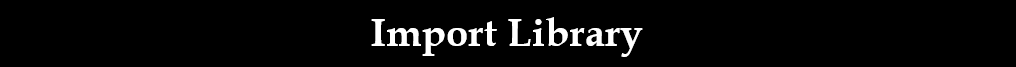

In [123]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats  as st
import pylab
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score,fbeta_score


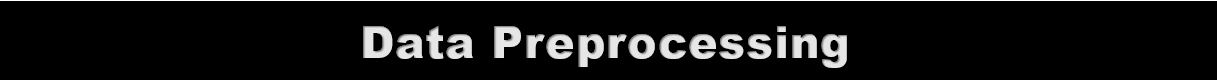

In [124]:
df=sns.load_dataset("iris")

In [125]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [126]:
df.shape

(150, 5)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [129]:
df.isna().sum().reset_index()

,index,0
0,sepal_length,0
1,sepal_width,0
2,petal_length,0
3,petal_width,0
4,species,0


##### There is No Null Values

In [130]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


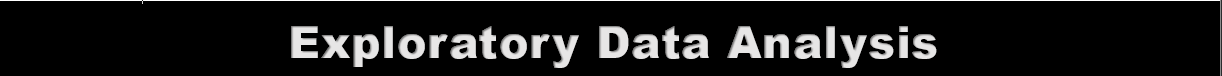

In [131]:
x=df.columns
print("-"*110)
print(x)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------


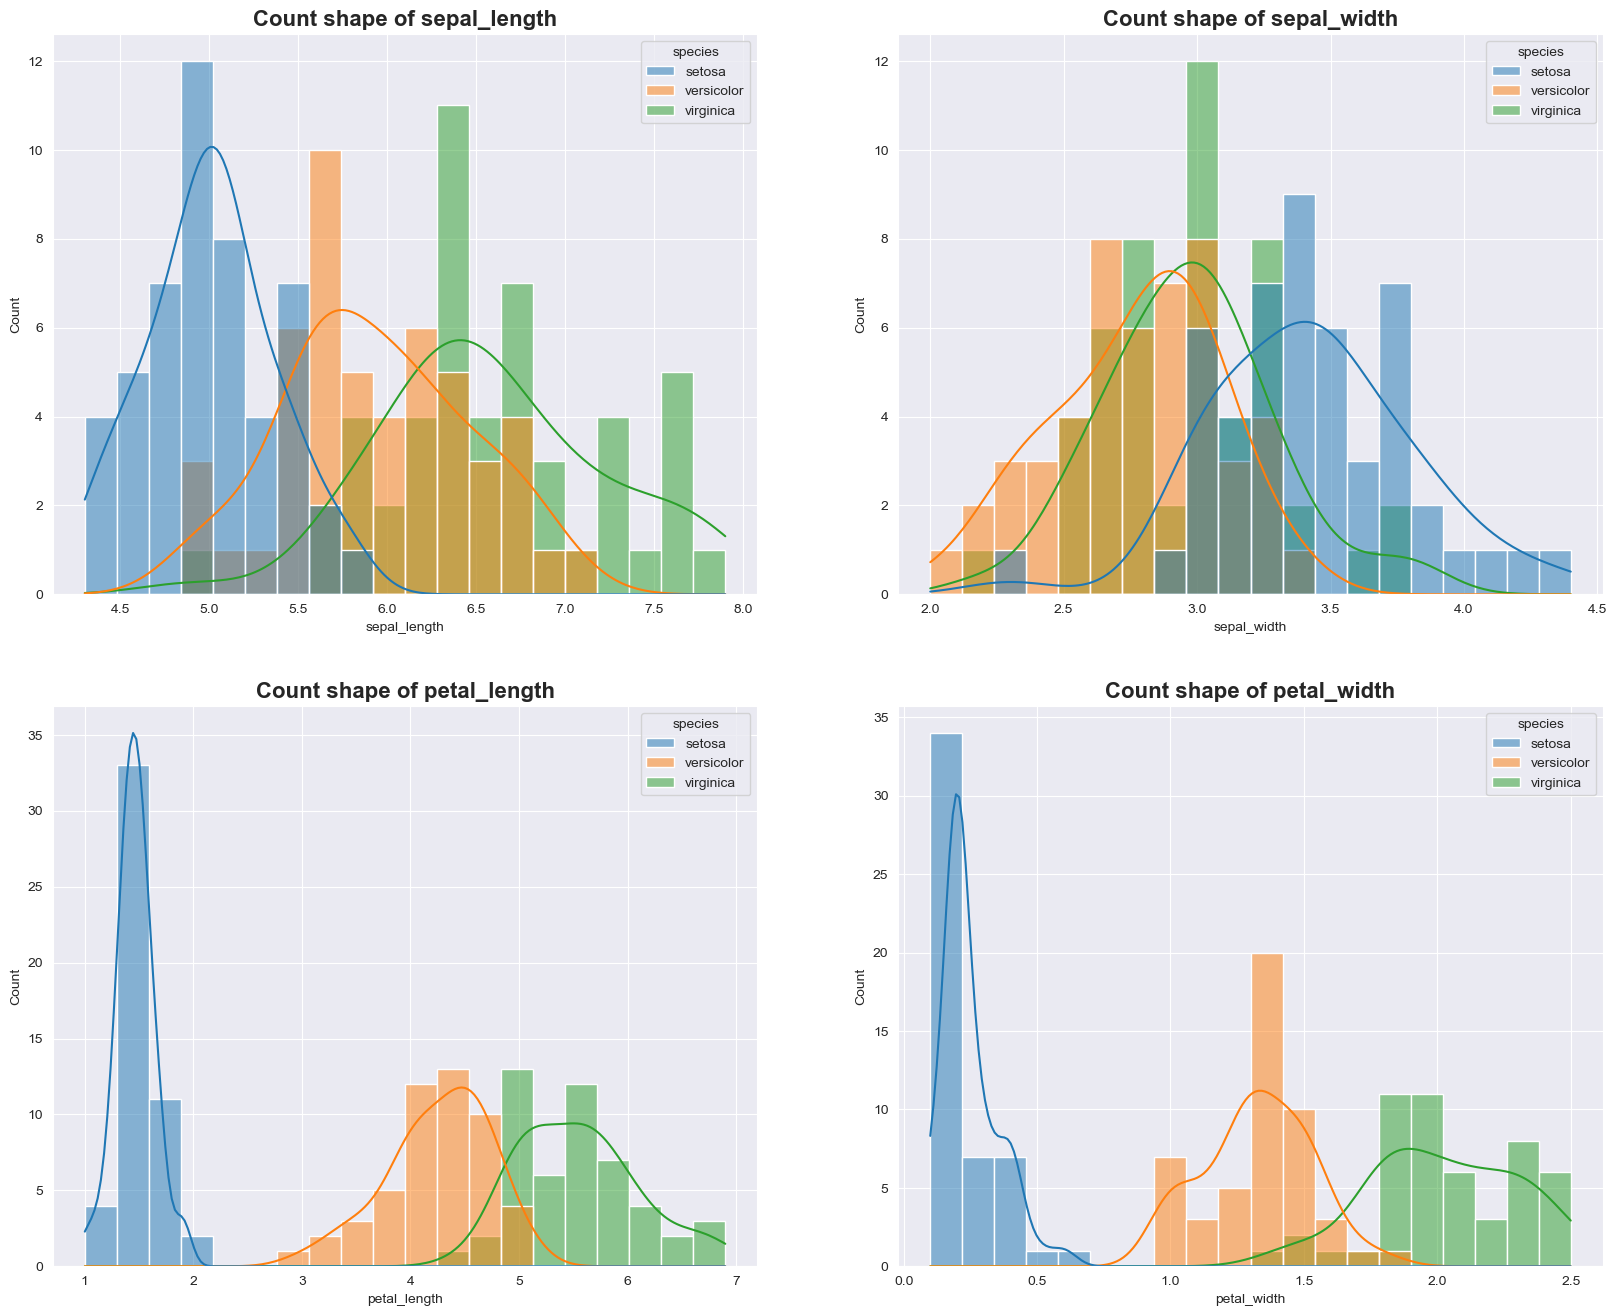

In [132]:
l=1
plt.figure(figsize=(20,16))
for i in x:
    if i=="species":
        pass
    else:
        plt.subplot(2,2,l)
        sns.histplot(data=df,x=i,hue="species",kde=True,bins=20)
        plt.title(f"Count shape of {i}",fontweight="bold",fontsize=16)
        l+=1
plt.show()

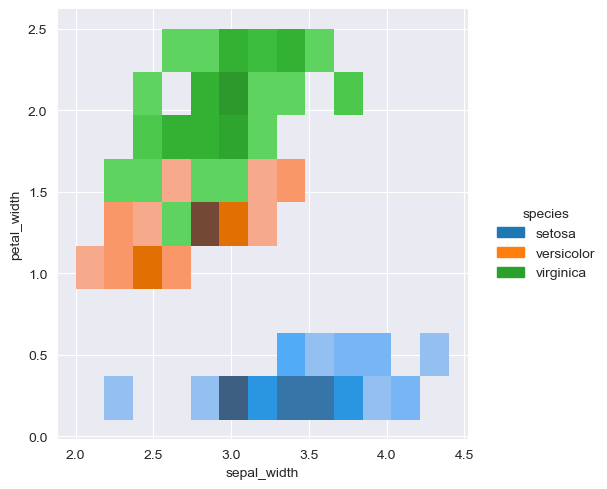

In [133]:
sns.displot(data=df,x="sepal_width",y="petal_width",hue="species");

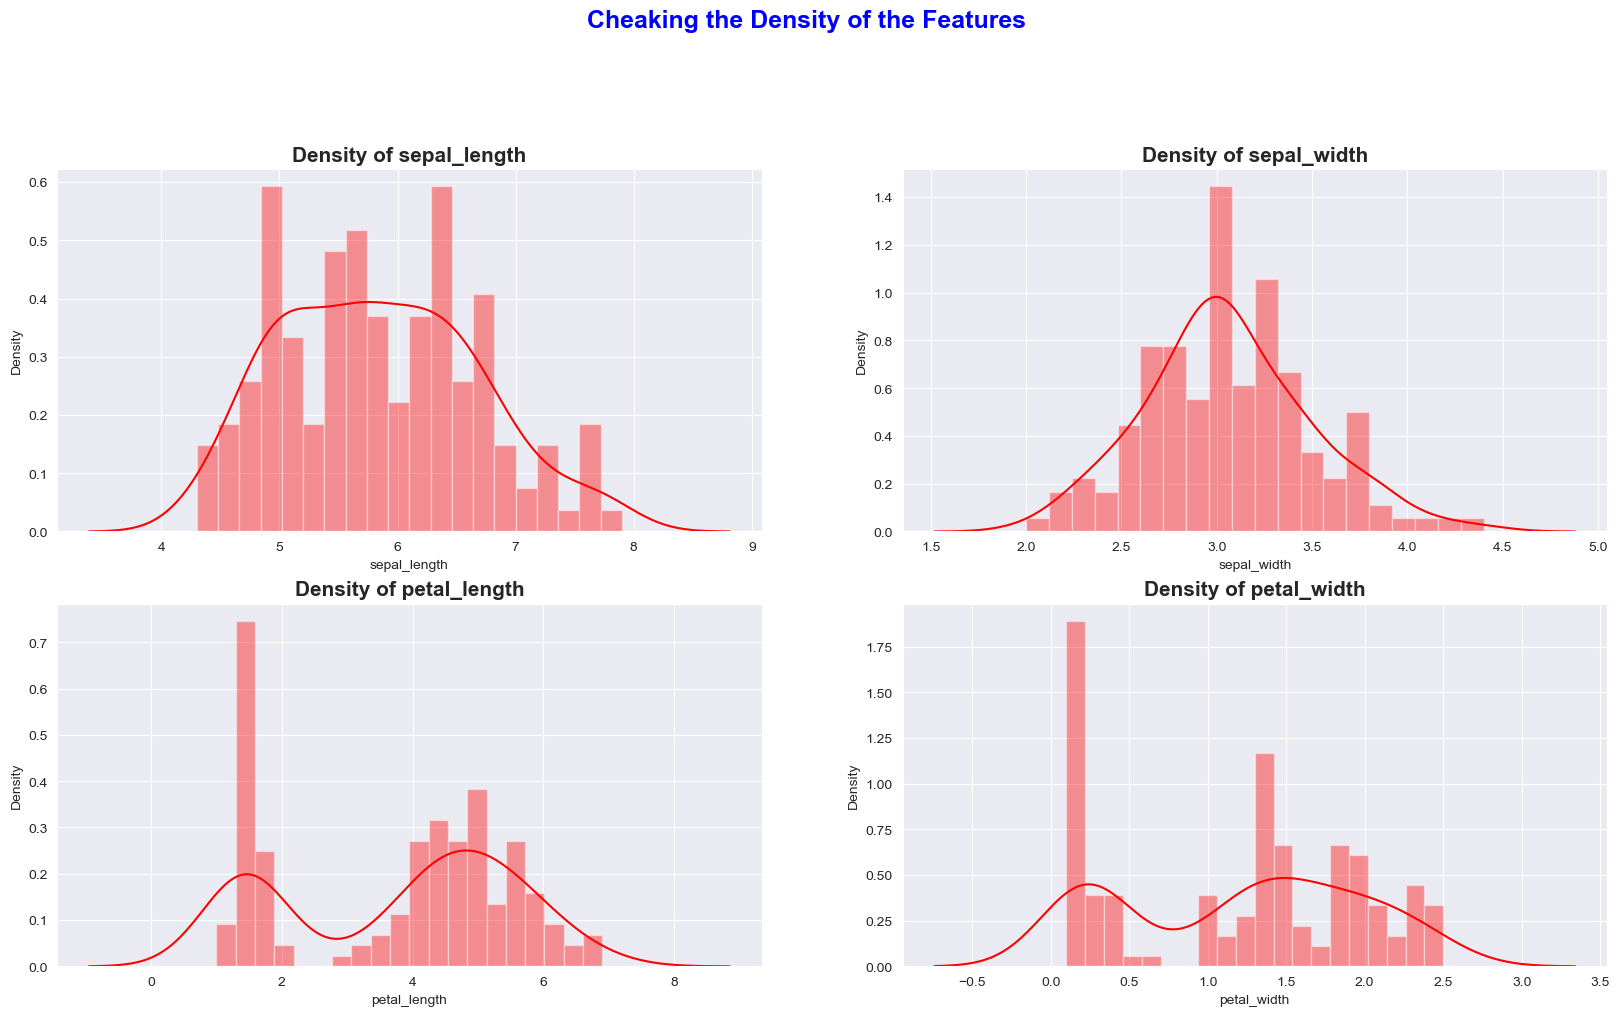

In [134]:
q=1
plt.figure(figsize=(20,16))
sns.set_style("darkgrid")
for i in df:
    if i == "species":
        pass
    else:
        plt.subplot(3,2,q)
        sns.distplot(df[i],bins=20,kde=True,color="red")
        plt.title(f"Density of {i}",fontweight="bold",fontsize=15)
        q+=1
plt.suptitle("Cheaking the Density of the Features",fontweight="bold",fontsize=18,color="blue")
plt.show()

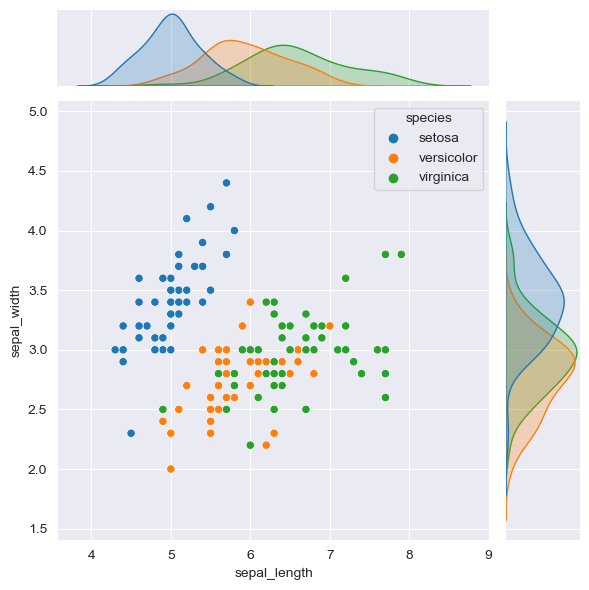

In [143]:
#plt.figure(figsize=(12,10))
sns.jointplot(x ='sepal_length', y ='sepal_width', data = df,color="orange",hue="species");
#plt.suptitle("Visulizing the sepal_length vs sepal_width",fontweight="bold",fontsize=15,color="orange");

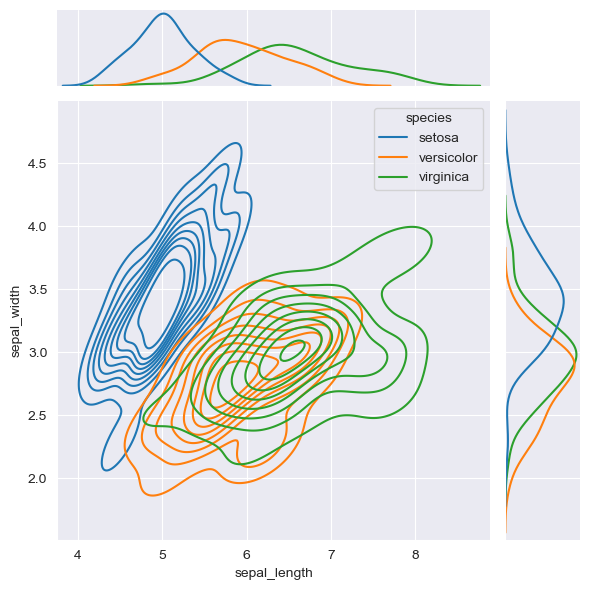

In [142]:
sns.jointplot(x ='sepal_length', y ='sepal_width', data = df,color="black",kind="kde",hue="species");

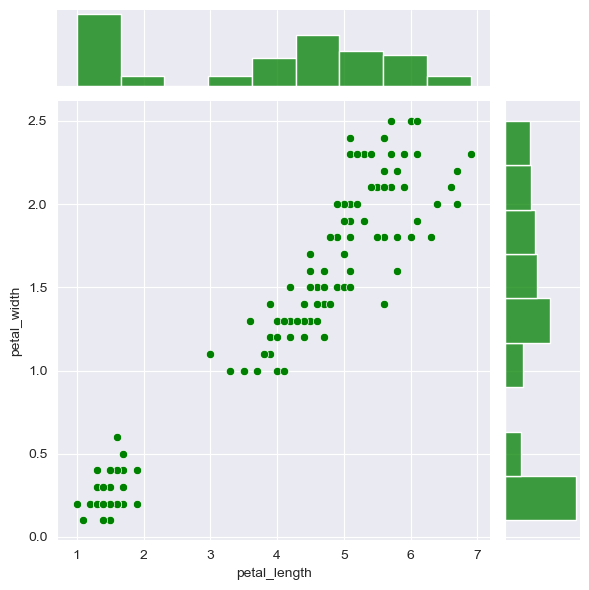

In [138]:
sns.jointplot(x ='petal_length', y ='petal_width', data = df,color="green");

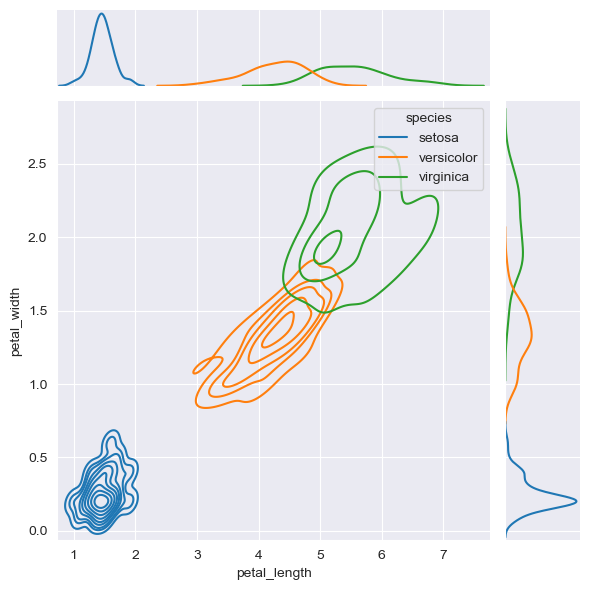

In [141]:
sns.jointplot(x ='petal_length', y ='petal_width', data = df,kind="kde",hue="species");

In [87]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Spices is going to change this column from object to int

In [89]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [90]:
df["species"]=df["species"].map({"virginica":0,"setosa":1,"versicolor":2})

In [91]:
df["species"].unique()

array([1, 2, 0], dtype=int64)

In [92]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Extract the Features and Target

In [93]:
x=df.drop("species",axis=1)

In [94]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
y=df[["species"]]

In [96]:
y.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
species,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Now use Model_selection in train test split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [99]:
print("-"*110)
print(f"The shape of the x_train is :- {x_train.shape}")
print("-"*110)
print(f"The shape of the y_train is :- {y_train.shape}")
print("-"*110)
print(f"The shape of the x_test is :- {x_test.shape}")
print("-"*110)
print(f"The shape of the y_test is :- {y_test.shape}")
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The shape of the x_train is :- (105, 4)
--------------------------------------------------------------------------------------------------------------
The shape of the y_train is :- (105, 1)
--------------------------------------------------------------------------------------------------------------
The shape of the x_test is :- (45, 4)
--------------------------------------------------------------------------------------------------------------
The shape of the y_test is :- (45, 1)
--------------------------------------------------------------------------------------------------------------


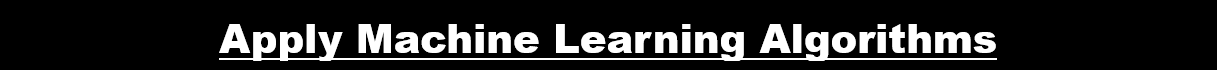

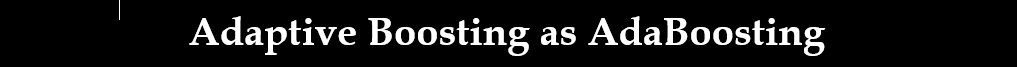

In [100]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [102]:
print("-"*110)
pred=ad.predict(x_test)
print("-"*110)
print("Predictions by Adaboost model :- \n",pred)
print("-"*110)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Predictions by Adaboost model :- 
 [1 1 0 1 1 1 1 0 0 0 1 0 0 0 2 1 0 0 1 2 2 2 0 2 1 0 2 2 1 2 2 2 2 0 1 0 1
 1 2 1 1 2 1 2 2]
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [103]:
ac=ad.score(x_test,y_test)
acc=ad.score(x_train,y_train)

In [104]:
print("-"*110)
print(f"The Accuracy of the testing is : {ac}")
print("-"*110)
print(f"The Accuracy of the training is : {acc}")
print("-"*110)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
The Accuracy of the testing is : 0.9555555555555556
--------------------------------------------------------------------------------------------------------------
The Accuracy of the training is : 0.9809523809523809
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [105]:
cm=confusion_matrix(y_test,pred)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


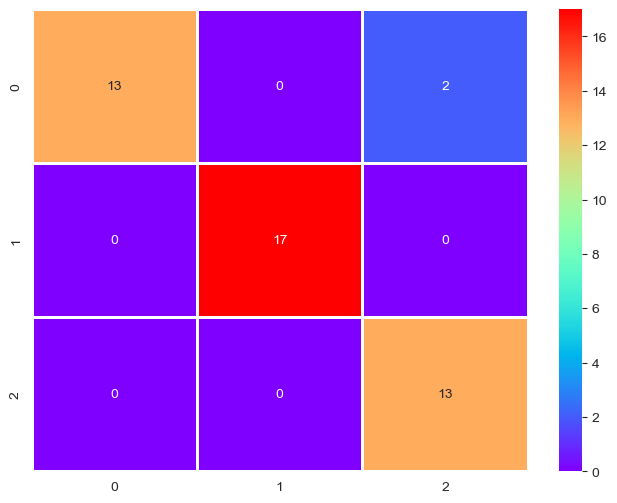

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [109]:
print("-"*110)
print("-"*110)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,linewidths=1,linecolor="w",cmap="rainbow")
plt.show()
print("-"*110)
print("-"*110)

In [111]:
clr=classification_report(y_test,pred)

In [112]:
print("-"*110)
print(clr)
print("-"*110)

--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      1.00      1.00        17
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

--------------------------------------------------------------------------------------------------------------


# Done -----------

## Thanks for Watching my Notebook ------------------ ❤️‍🔥❤️‍🔥❤️‍🔥